**Aim:** Principal Component Analysis (PCA)


*   Perform PCA on a dataset to reduce dimensionality.
*   Evaluate the explained variance and select the appropriate number of principal
components.

*    Visualize the data in the reduced-dimensional space.








### 1\. Reducing Features Using Principal Components

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load your dataset
df = pd.read_csv('/content/finance_economics_dataset.csv')

# Drop non-numeric or irrelevant columns for PCA (adjust based on your dataset)
X = df.drop(['Date', 'Stock Index'], axis=1).values

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a PCA that will retain 99% of the variance
pca = PCA(n_components=0.99, whiten=True)
X_pca = pca.fit_transform(X_scaled)

print("Original number of features:", X.shape[1])
print("Reduced number of features:", X_pca.shape[1])

Original number of features: 22
Reduced number of features: 19


### 2\. Reducing Features When Data Is Linearly Inseparable

In [ ]:
from sklearn.decomposition import KernelPCA

# Use two numerical columns for kernel PCA (adjust if your dataset has other columns)
features = df[['Open Price', 'Close Price']].values

# Apply kernel PCA with rbf kernel
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=1)
features_kpca = kpca.fit_transform(features)

print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_kpca.shape[1])

Original number of features: 2
Reduced number of features: 1


### 3\. Reducing Features by Maximizing Class Separability

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Example: Use all features except the target ('Stock Index') and 'Date'
X = df.drop(['Date', 'Stock Index'], axis=1).values
y = df['Stock Index'].values

# Reduce to 1 feature/component maximizing class separability
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X, y)

print("Original number of features:", X.shape[1])
print("Reduced number of features:", X_lda.shape[1])
print("Explained variance ratio:", lda.explained_variance_ratio_)

Original number of features: 22
Reduced number of features: 1
Explained variance ratio: [0.69140472]


### 4. Visualize Data Before and After PCA

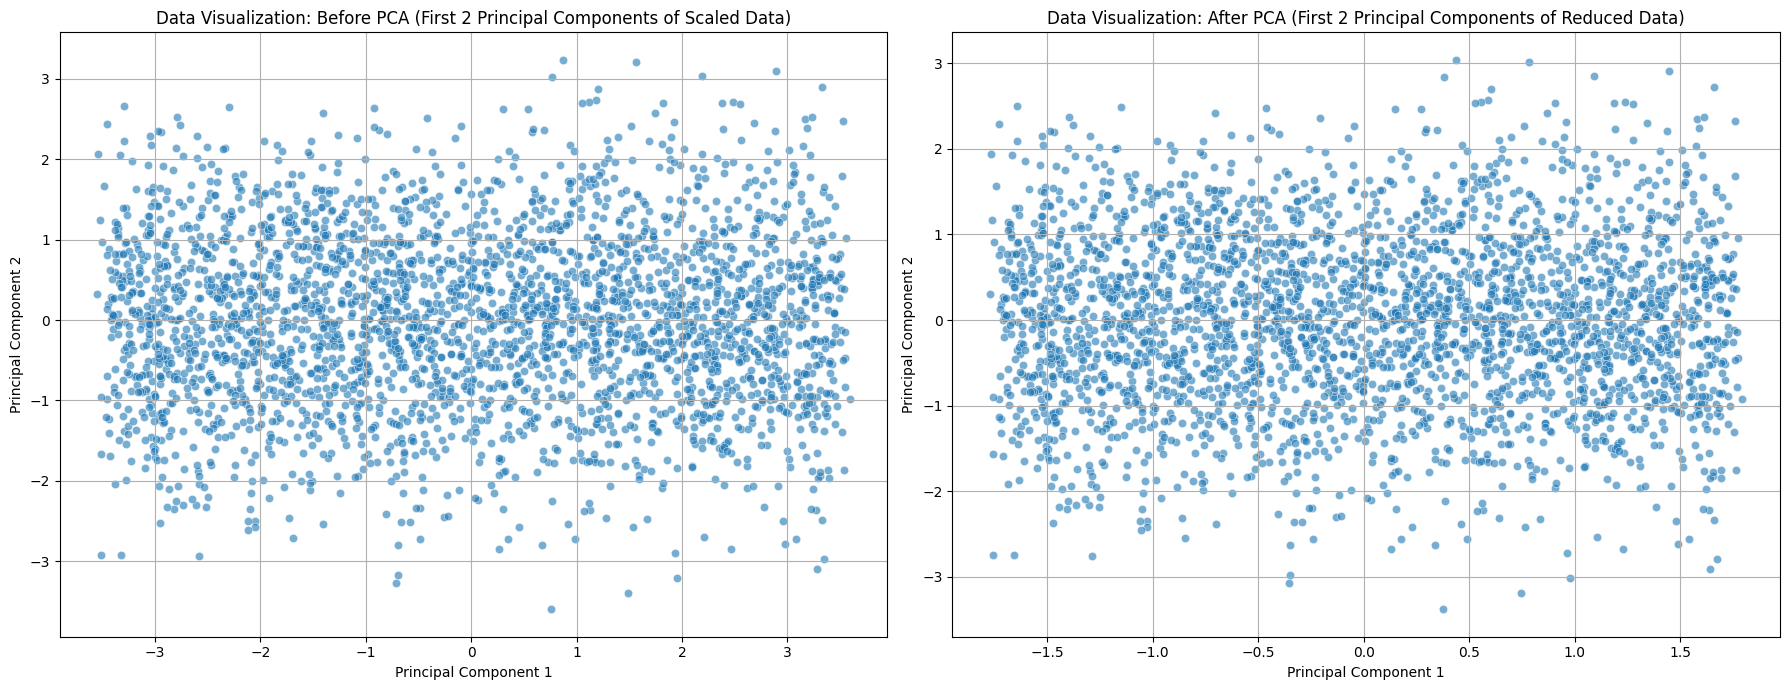

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
# For 'Before PCA' visualization, project X_scaled onto 2 components for plotting
pca_2d_before = PCA(n_components=2)
X_scaled_2d = pca_2d_before.fit_transform(X_scaled)
# Create a figure with two subplots
plt.figure(figsize=(18, 7)) # Adjust figure size to accommodate two plots
# First subplot: Before PCA
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.scatterplot(
x=X_scaled_2d[:, 0],
y=X_scaled_2d[:, 1],
alpha=0.6
)
plt.title('Data Visualization: Before PCA (First 2 Principal Components of Scaled Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
# Second subplot: After PCA
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.scatterplot(
x=X_pca[:, 0],
y=X_pca[:, 1],
alpha=0.6
)
plt.title('Data Visualization: After PCA (First 2 Principal Components of Reduced Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()